In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt 
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from seaborn import heatmap
from pandas.plotting import radviz

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import math as m

In [2]:
df=pd.read_csv('dataset.csv',sep=',')
df


,time,velocity,long_creepage,yaw_angle,wear_number,lateral_displacement,lateral_creepage,spin_creepage,yaw_angle_pos,contact_angle,long_creep_force,lateral_creep_force
0,19.81,5.55108,0.000667,-0.009065,23.452800,0.003855,0.000725,0.762058,0.001303,0.239556,-6390.460,5214.30
1,1.99,5.26723,-0.001248,0.000031,0.020740,-0.000002,0.000005,0.154546,0.000006,0.047974,254.393,1080.50
2,24.36,5.54751,-0.000984,-0.002053,0.293188,-0.000107,0.000154,0.118364,0.000456,0.036808,-495.274,1564.58
3,61.30,5.55212,0.016841,0.007345,152.713000,-0.002236,0.015512,2.231680,-0.009031,0.776315,-1888.780,9451.65
4,28.32,5.54444,0.000080,-0.006540,0.266178,0.001265,-0.000149,0.261106,-0.001348,0.080937,228.270,1717.80
...,...,...,...,...,...,...,...,...,...,...,...,...
19473,19.70,8.31473,0.000164,0.001777,20.652100,-0.000089,0.001041,0.792707,0.001681,0.248981,-4737.920,3181.47
19474,47.57,5.56795,-0.008443,0.037504,202.171000,0.004203,-0.042786,-0.021669,0.041778,0.005805,-2122.390,-3707.02
19475,20.70,13.88650,-0.005157,0.005796,173.089000,-0.004576,0.019560,2.935410,-0.008881,1.189120,-4074.020,3400.51
19476,42.40,13.90070,-0.001037,0.009230,8.488080,-0.001271,0.000579,0.011328,-0.001087,0.004648,5108.350,1893.48


In [3]:
columns_names = df.columns
for i in range(len(columns_names)):
    print(str(i)+' '+str(columns_names[i]))

0 time
1 velocity
2 long_creepage
3 yaw_angle
4 wear_number
5 lateral_displacement
6 lateral_creepage
7 spin_creepage
8 yaw_angle_pos
9 contact_angle
10 long_creep_force
11 lateral_creep_force


In [7]:
x= df[columns_names[[1,2,6,7,10,11]]]
y=df[columns_names[4]]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3896
number of training samples: 15582


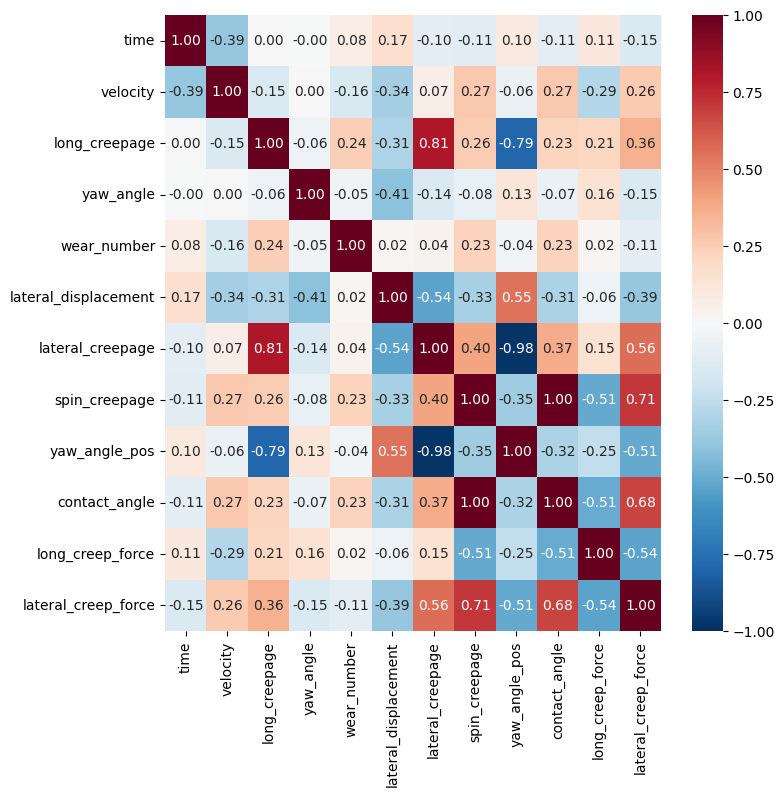

In [5]:
df.corr()

fig,ax = plt.subplots(figsize=(8,8))
ax = heatmap(df.corr(), fmt=".2f",annot=True,ax=ax,cmap='RdBu_r',vmax=1,vmin=-1)

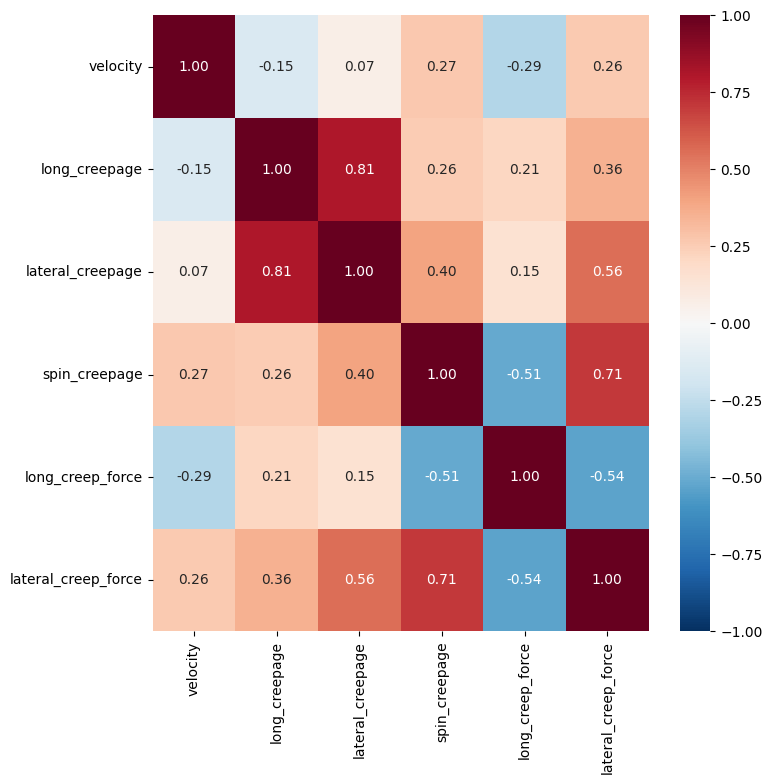

In [9]:
x.corr()

fig,ax = plt.subplots(figsize=(8,8))
ax = heatmap(x.corr(), fmt=".2f",annot=True,ax=ax,cmap='RdBu_r',vmax=1,vmin=-1)

In [93]:
from scipy.stats import chi2_contingency

In [94]:
crosstab = pd.crosstab(df['wear_number'], df['long_creepage'])
crosstab

long_creepage,-0.031340,-0.031336,-0.031334,-0.031320,-0.031317,-0.031294,-0.031289,-0.031257,-0.031251,-0.031209,...,0.043661,0.043716,0.043742,0.043783,0.043804,0.043832,0.043847,0.043863,0.043871,0.043876
wear_number,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.459380e-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.775350e-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.717240e-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.403070e-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.403850e+02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.429900e+02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.450430e+02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Wartość statystyki chi-kwadrat:", chi2)
print("Wartość p:", p)
print("Stopnie swobody:", dof)
print("Oczekiwane wartości:", expected)

Wartość statystyki chi-kwadrat: 376261395.4999567
Wartość p: 0.2581710446337356
Stopnie swobody: 376243593
Oczekiwane wartości: [[5.13399733e-05 5.13399733e-05 5.13399733e-05 ... 5.13399733e-05
  5.13399733e-05 5.13399733e-05]
 [5.13399733e-05 5.13399733e-05 5.13399733e-05 ... 5.13399733e-05
  5.13399733e-05 5.13399733e-05]
 [5.13399733e-05 5.13399733e-05 5.13399733e-05 ... 5.13399733e-05
  5.13399733e-05 5.13399733e-05]
 ...
 [5.13399733e-05 5.13399733e-05 5.13399733e-05 ... 5.13399733e-05
  5.13399733e-05 5.13399733e-05]
 [5.13399733e-05 5.13399733e-05 5.13399733e-05 ... 5.13399733e-05
  5.13399733e-05 5.13399733e-05]
 [5.13399733e-05 5.13399733e-05 5.13399733e-05 ... 5.13399733e-05
  5.13399733e-05 5.13399733e-05]]


In [96]:
#fig,ax = plt.subplots(figsize=(12,12))
#new_df = x.copy()
#new_df['target']=y
#radviz(new_df,'target',ax=ax)

In [97]:
'''def CVGridSearch(x_train, y_train, x_test, y_test, param_grid, cv=5):
    
    xgb_regressor = XGBRegressor(booster='gbtree', base_score=0.5, random_state=42,
                                  colsample_bylevel=1, colsample_bytree=1,
                                  gamma=0, objective='reg:squarederror', eval_metric='rmse')

    grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=10, verbose=False)

    best_model = grid_search.best_estimator_

    print("Najlepsze parametry znalezione podczas przeszukiwania siatki:")
    print(grid_search.best_params_)

    return best_model

param_grid = {
    'max_depth': [5,7,10,20,40,50],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [200, 500,1000],
}

best_model = CVGridSearch(x_train, y_train, x_test, y_test, param_grid)

best_model.score(x_test,y_test)'''


'def CVGridSearch(x_train, y_train, x_test, y_test, param_grid, cv=5):\n    \n    xgb_regressor = XGBRegressor(booster=\'gbtree\', base_score=0.5, random_state=42,\n                                  colsample_bylevel=1, colsample_bytree=1,\n                                  gamma=0, objective=\'reg:squarederror\', eval_metric=\'rmse\')\n\n    grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=cv, scoring=\'neg_mean_squared_error\')\n    grid_search.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=10, verbose=False)\n\n    best_model = grid_search.best_estimator_\n\n    print("Najlepsze parametry znalezione podczas przeszukiwania siatki:")\n    print(grid_search.best_params_)\n\n    return best_model\n\nparam_grid = {\n    \'max_depth\': [5,7,10,20,40,50],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'n_estimators\': [200, 500,1000],\n}\n\nbest_model = CVGridSearch(x_train, y_train, x_test, y_test, param_grid)\n\nbest_model.score(x_t

In [98]:
reg_1 = XGBRegressor(booster='gbtree', base_score=0.5, random_state=42,
                                  colsample_bylevel=1, colsample_bytree=1,learning_rate=0.1, max_depth=10, n_estimator=1000,
                                  gamma=0, objective='reg:squarederror', eval_metric='rmse') 

reg_1.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=10, verbose=False)

c:\Users\Marcin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Marcin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [09:56:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=1000,
             n_estimators=None, n_jobs=None, num_parallel_tree=None, ...)

In [99]:
reg_1.score(x_test,y_test)

0.9991849160981553

In [100]:
feature_names = x.columns
feature_importance = reg_1.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

# Wyświetlanie istotności cech wraz z nazwami zmiennych
for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importance[i]}")

lateral_creepage: 0.9553346633911133
spin_creepage: 0.01951238140463829
lateral_creep_force: 0.01232653297483921
long_creep_force: 0.010741863399744034
long_creepage: 0.0018618435133248568
velocity: 0.00022276502568274736


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

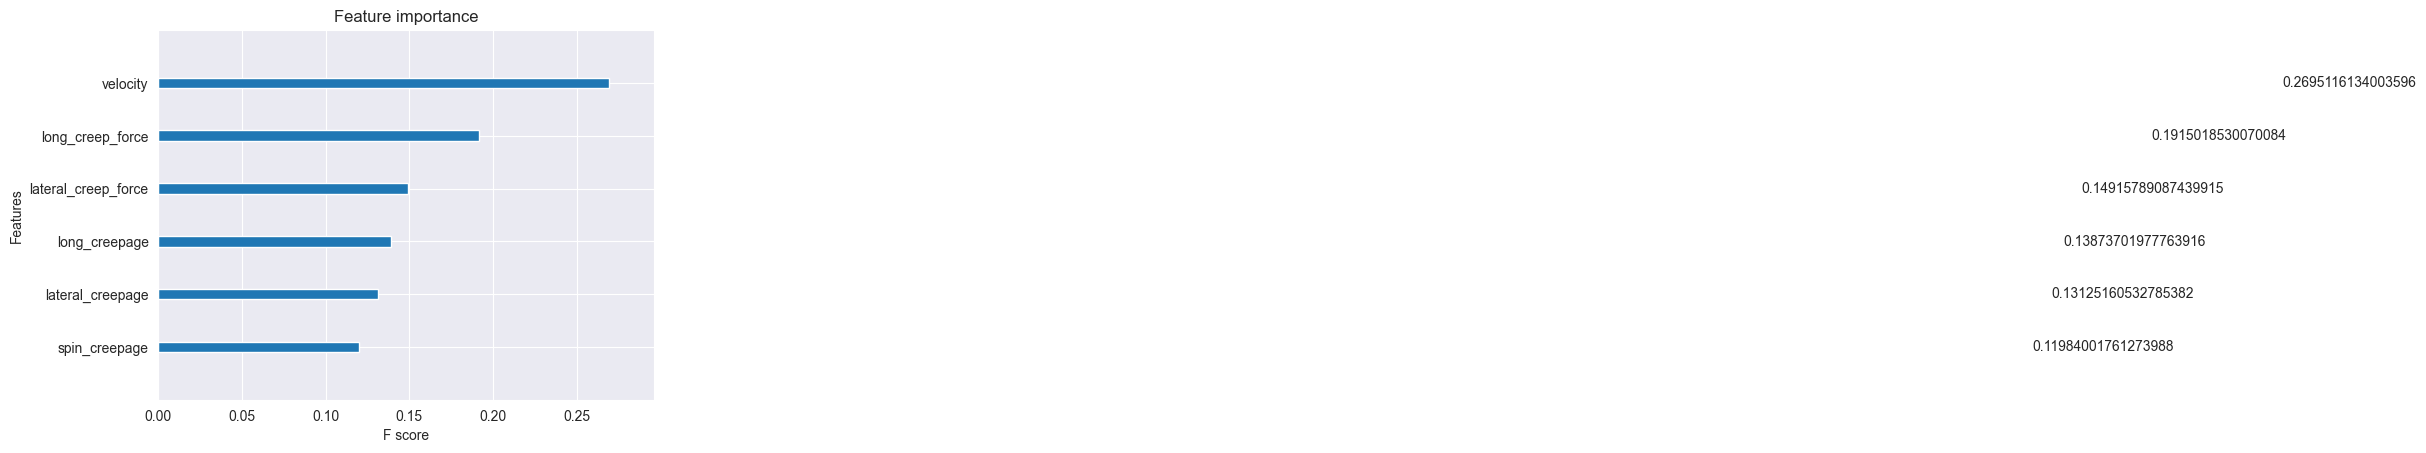

In [117]:
importance = reg_1.get_booster().get_score(importance_type='weight')
total_importance = sum(importance.values())
normalized_importance = {k: v / total_importance for k, v in importance.items()}
xgb.plot_importance(normalized_importance)


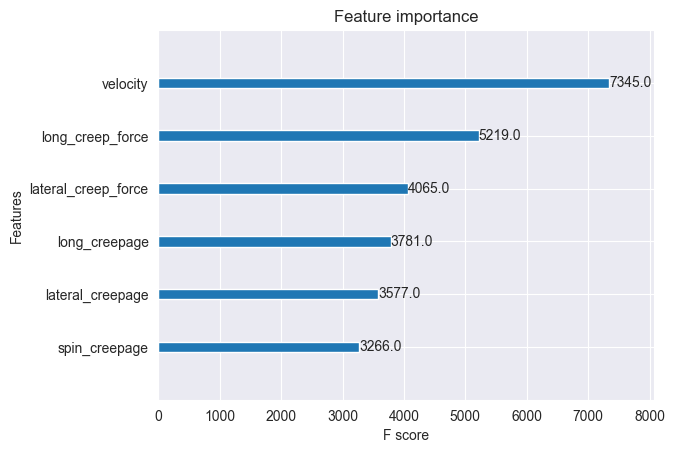

lateral_creepage: 0.9553346633911133
spin_creepage: 0.01951238140463829
lateral_creep_force: 0.01232653297483921
long_creep_force: 0.010741863399744034
long_creepage: 0.0018618435133248568
velocity: 0.00022276502568274736


In [111]:
xgb.plot_importance(reg_1,importance_type='weight')
plt.show()

feature_names = x.columns

feature_importance = reg_1.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

names=[]
fi_value=[]


for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importance[i]}") #gain jako wskaźnik feature importance
    names.append(feature_names[i])
    fi_value.append(feature_importance[i])

In [102]:
feature_importance_data=pd.DataFrame({'variable':names,'feature_importance':fi_value})

In [103]:
feature_importance_data

,variable,feature_importance
0,lateral_creepage,0.955335
1,spin_creepage,0.019512
2,lateral_creep_force,0.012327
3,long_creep_force,0.010742
4,long_creepage,0.001862
5,velocity,0.000223


<Figure size 2000x1000 with 0 Axes>

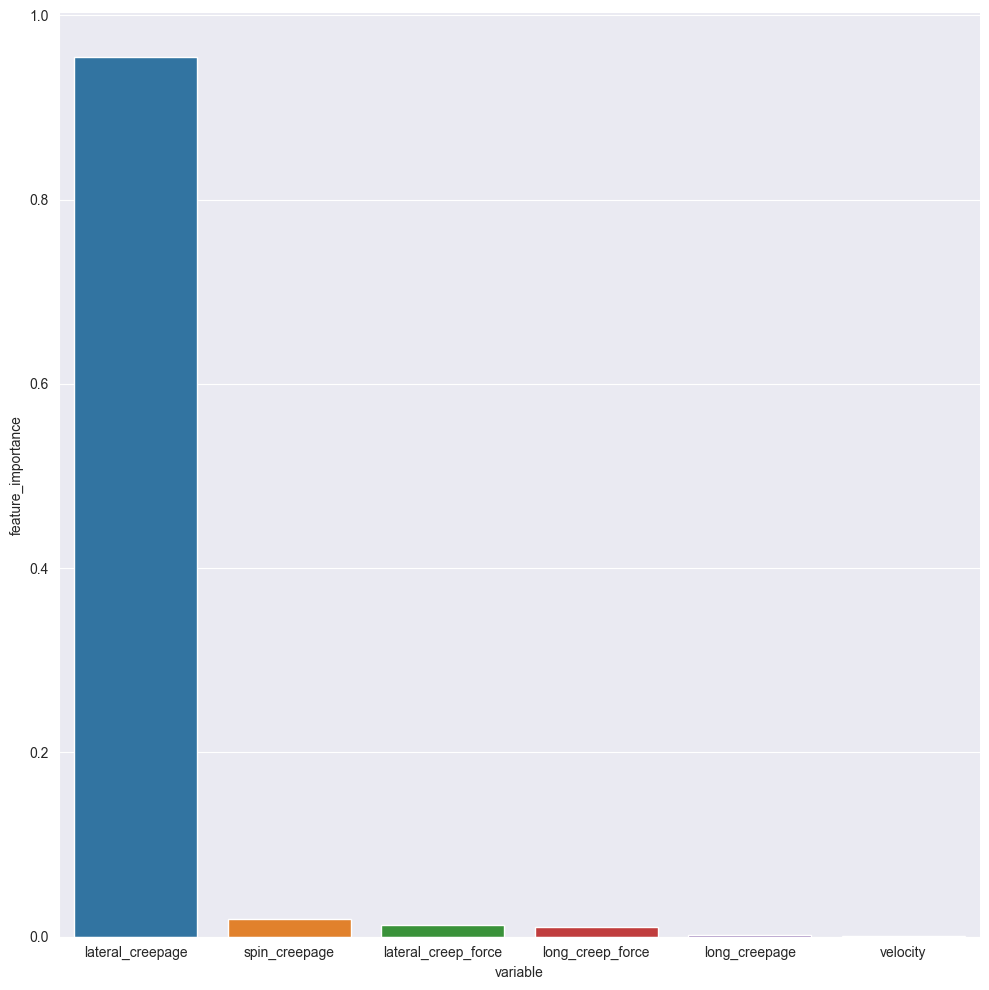

In [104]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.catplot(x='variable', y='feature_importance', data=feature_importance_data, kind='bar',height=10)
plt.show()
